<h2>Analyzing Neighborhoods in Mumbai, India for Opening a Restaurant</h2>

<h3>Contents</h3>

1. Introduction


2. Data Collection


3. Methodology

   3.1 Libraries
   
   3.2 Data Extraction

   3.3 Data Wrangling
   
   3.4 Data Visualization
   
   3.5 Using Foursquare API
   
      3.5.a Generalizing Foursquare API
      
   3.6 Clustering Neighborhoods Based on Venues Similarity   
      
      3.6.a Clustering neighborhoods
         
      3.6.b Visualizing Clusters
      
      3.6.c Examining Each Cluster
      
   
4. Results and Discussion

   
5. Conclusion   

<h3>1. Introduction</h3>

Mumbai is the financial capital of India and is one of the most densely populated cities in the world. It lies on the west coast of India and attracts heavy tourism from all over the globe every year. It is one of the major hubs of the world and is extremely diverse with people from various ethnicities residing here. The multi-cultural nature of the city of Mumbai has brought along with it numerous cuisines from all over the world. The people of India generally love food and I personally love to try different cuisines and experience different flavors. Thus, the aim of this project is to study the neighborhoods in Mumbai to determine possible locations for opening a restaurant. This project can be useful for business owners and entrepreneurs who are looking to invest in a restaurant in Mumbai. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders.

<h3>2. Data Collection</h3>

The data of the neighborhoods in Mumbai was scraped from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai. The data is read into a pandas data frame using the read_html() method. The main reason for doing so is that the Wikipedia page provides a comprehensive and detailed table of the data which can easily be scraped using the read_html() method of pandas.

The geographical coordinates for Mumbai data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Mumbai using the Folium library in python. The geocoder library in python has been used to obtain latitude and longitude data for various neighborhoods in Mumbai. The coordinates of all neighborhoods in Mumbai are used to check the accuracy of coordinates given on Wikipedia and replace them in our data frame if the absolute difference is more than 0.001. These coordinates are then further used for plotting using the Folium library in python.

The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Mumbai and is used to study the popular venues of different neighborhoods.

<h3>3. Methodology</h3>

<h4>3.1 Libraries</h4>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import requests

from collections import Counter

!pip install folium
import folium

!pip install lxml

from bs4 import BeautifulSoup

from sklearn.cluster import KMeans

from pandas.io.json import json_normalize

%matplotlib inline
from matplotlib import pyplot as plt 

!pip install geocoder
import geocoder
from geopy.geocoders import Nominatim

from IPython.display import Image
from IPython.core.display import HTML
from IPython.display import display_html

import matplotlib.cm as cm
import matplotlib.colors as color

print("Done...!!!")

Done...!!!


<h3>3.2 Data Extraction</h3>

Scraping data from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai and reading it into a dataframe.

In [2]:
df_Mumbai = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df_Mumbai.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df_Mumbai.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,Chakala,"Andheri,Western Suburbs",19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111



<h3>3.3 Data Wrangling</h3>

Lets look at the different values for Location present in the Location column.

In [4]:
df_Mumbai['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             9
Western Suburbs                     5
Eastern Suburbs                     4
Powai,Eastern Suburbs               3
Ghatkopar,Eastern Suburbs           3
Kandivali West,Western Suburbs      3
Mira-Bhayandar,Western Suburbs      3
Bandra,Western Suburbs              3
Harbour Suburbs                     2
Kalbadevi,South Mumbai              2
Malad,Western Suburbs               2
Borivali (West),Western Suburbs     2
Vasai,Western Suburbs               2
Khar,Western Suburbs                2
Goregaon,Western Suburbs            2
Mumbai                              2
Trombay,Harbour Suburbs             1
Kurla,Eastern Suburbs               1
Colaba,South Mumbai                 1
Sanctacruz,Western Suburbs          1
Fort,South Mumbai                   1
Antop Hill,South Mumbai             1
Vile Parle,Western Suburbs          1
Kamathipura,South Mumbai            1
Byculla,South Mumbai                1
Govandi,Harb


We can see that there are many locations that appear only once or twice. This is because the main locations like "Western Suburbs" or "South Mumbai" are being further divided by the area within these locations. Lets clean the Location column to make it easier to understand.

In [5]:

df_Mumbai['Location'] = df_Mumbai['Location'].apply(lambda x: x.split(',')[-1])
df_Mumbai.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,Chakala,Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


Now lets again look at the values in Location column.



In [7]:

df_Mumbai['Location'].value_counts()

South Mumbai       39
Western Suburbs    36
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

In [8]:
df_Mumbai

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,Chakala,Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000
89,Gowalia Tank,South Mumbai,18.962450,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.850850



Although the data we gathered contained latitude and longitude information, we can reconfirm these coordinates using Geocoder.

In [11]:

df_Mumbai['Latitude1'] = None
df_Mumbai['Longitude1'] = None

for i, neigh in enumerate(df_Mumbai['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df_Mumbai.loc[i, 'Latitude1'] = latitude
    df_Mumbai.loc[i, 'Longitude1'] = longitude

df_Mumbai.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1
0,Amboli,Western Suburbs,19.129300,72.843400,19.12906,72.84644
1,Chakala,Western Suburbs,19.111388,72.860833,19.10836,72.86233
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.12505,72.83248
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.12638,72.8242
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.14321,72.82497
5,Marol,Western Suburbs,19.119219,72.882743,19.11905,72.88281
6,Sahar,Western Suburbs,19.098889,72.867222,19.105445,72.860602
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.12858,72.82141
8,Versova,Western Suburbs,19.120000,72.820000,19.13769,72.81348
9,Mira Road,Western Suburbs,19.284167,72.871111,19.265623,72.870643



We can create new columns to see the difference between coordinate values obtained from wikipedia and those obtained from geocoder. We will take the absolute difference between these values and store them in our dataframe.

In [12]:
df_Mumbai['Latdiff'] = abs(df_Mumbai['Latitude'] - df_Mumbai['Latitude1'])
df_Mumbai['Longdiff'] = abs(df_Mumbai['Longitude'] - df_Mumbai['Longitude1'])
df_Mumbai.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.129300,72.843400,19.12906,72.84644,0.00024,0.00304
1,Chakala,Western Suburbs,19.111388,72.860833,19.10836,72.86233,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.12505,72.83248,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.12638,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.14321,72.82497,0.012395,0.0043
5,Marol,Western Suburbs,19.119219,72.882743,19.11905,72.88281,0.000169,0.000067
6,Sahar,Western Suburbs,19.098889,72.867222,19.105445,72.860602,0.006556,0.00662
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.12858,72.82141,0.000472,0.004392
8,Versova,Western Suburbs,19.120000,72.820000,19.13769,72.81348,0.01769,0.00652
9,Mira Road,Western Suburbs,19.284167,72.871111,19.265623,72.870643,0.018544,0.000468


We can see that the latitude and longitudes from wikipedia and geocoder are very similar, yet there are some differences. We will replace the values with the coordinates obtained from geocoder if the absolute difference is more than 0.001.

In [13]:
df_Mumbai.loc[df_Mumbai.Latdiff>0.001, 'Latitude'] = df_Mumbai.loc[df_Mumbai.Latdiff>0.001, 'Latitude1']
df_Mumbai.loc[df_Mumbai.Longdiff>0.001, 'Longitude'] = df_Mumbai.loc[df_Mumbai.Longdiff>0.001, 'Longitude1']
df_Mumbai.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.84644,19.12906,72.84644,0.00024,0.00304
1,Chakala,Western Suburbs,19.10836,72.86233,19.10836,72.86233,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.83248,19.12505,72.83248,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.12638,72.8242,19.12638,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.14321,72.82497,19.14321,72.82497,0.012395,0.0043
5,Marol,Western Suburbs,19.119219,72.882743,19.11905,72.88281,0.000169,0.000067
6,Sahar,Western Suburbs,19.105445,72.860602,19.105445,72.860602,0.006556,0.00662
7,Seven Bungalows,Western Suburbs,19.129052,72.82141,19.12858,72.82141,0.000472,0.004392
8,Versova,Western Suburbs,19.13769,72.81348,19.13769,72.81348,0.01769,0.00652
9,Mira Road,Western Suburbs,19.265623,72.871111,19.265623,72.870643,0.018544,0.000468



In order to confirm if values have actually been replaced we can use the where method. Values with NaN means those values have not been replaced.

In [15]:
df_Mumbai.where(df_Mumbai['Latitude']==df_Mumbai['Latitude1'])
df_Mumbai.where(df_Mumbai['Longitude']==df_Mumbai['Longitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.84644,19.12906,72.84644,0.00024,0.00304
1,Chakala,Western Suburbs,19.10836,72.86233,19.10836,72.86233,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.83248,19.12505,72.83248,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.12638,72.8242,19.12638,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.14321,72.82497,19.14321,72.82497,0.012395,0.0043
...,...,...,...,...,...,...,...,...
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Gowalia Tank,South Mumbai,18.96446,72.81117,18.96446,72.81117,0.00201,0.001467
90,Dava Bazaar,South Mumbai,19.1314,72.92696,19.1314,72.92696,0.184518,0.095598
91,Dharavi,Mumbai,19.04674,72.85461,19.04674,72.85461,0.006532,0.00376


Now that we have the data, we can drop the columns that are no longer useful.

In [16]:

df_Mumbai.drop(['Latitude1', 'Longitude1', 'Latdiff', 'Longdiff'], axis=1, inplace=True)
df_Mumbai.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.1293,72.84644
1,Chakala,Western Suburbs,19.10836,72.86233
2,D.N. Nagar,Western Suburbs,19.124085,72.83248
3,Four Bungalows,Western Suburbs,19.12638,72.8242
4,Lokhandwala,Western Suburbs,19.14321,72.82497
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.105445,72.860602
7,Seven Bungalows,Western Suburbs,19.129052,72.82141
8,Versova,Western Suburbs,19.13769,72.81348
9,Mira Road,Western Suburbs,19.265623,72.871111



<h3>3.4 Data Visualization</h3>

To understand our data better, we can see how many neighborhoods are in each location.

In [17]:
Mumbai_neighborhoods = df_Mumbai.groupby('Location')['Neighborhood'].nunique()
Mumbai_neighborhoods

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    36
Name: Neighborhood, dtype: int64


We can now plot this data.

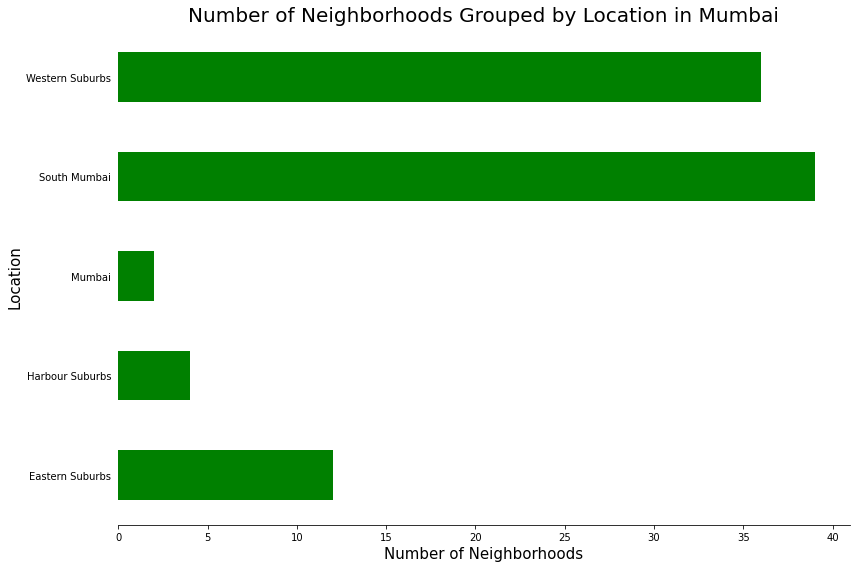

In [20]:
fig = plt.figure(figsize=(12,8))

ax = Mumbai_neighborhoods.plot(kind='barh', color='Green')
ax.set_title('Number of Neighborhoods Grouped by Location in Mumbai', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()


Clearly we can see that South Mumbai and Western Suburbs have the most number of neighborhoods. Notice how we see one of the locations as Mumbai itself? This is because the neighborhoods contained in this location are located at the outskirts of Mumbai and thus have been grouped as just Mumbai.

Now lets visualize the neighborhoods on a map using Folium. First we will obtain the geographical coordinates of Mumbai using GeoPy.

In [22]:
address = 'Mumbai, IN'
geolocator = Nominatim(user_agent="Mumbai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Mumbai are 19.0759899, 72.8773928.


In [26]:
map_Mumbai=folium.Map(location=[latitude, longitude], zoom_start=12)

for lat,lng,location,area in zip(
      df_Mumbai['Latitude'],
      df_Mumbai['Longitude'],
      df_Mumbai['Location'],
      df_Mumbai['Neighborhood']):
    label='{},{}'.format(area, location)
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
       [lat,lng],
       radius=5,
       popup=label,
       color='green',
       fill=True,
       fill_color='#3186cc',
       fill_opacity_html=False).add_to(map_Mumbai)

map_Mumbai 

<h3>3.5 Using Foursquare API</h3>

Now we can start working with the Foursquare API to obtain venue recommendations.

Lets create the Foursquare credentials first.

In [27]:
# The code was removed by Watson Studio for sharing.

Lets start by exploring just the first neighborhood in our dataframe using Foursquare API.

In [28]:
neighborhood_name = df_Mumbai.loc[0, 'Neighborhood']
neighborhood_lat = df_Mumbai.loc[0, 'Latitude']
neighborhood_long = df_Mumbai.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Amboli and it's geographical coordinates are 19.1293 latitude and 72.84644000000003 longitude



We will now extract the top 200 venues near Amboli with a radius of 1000m or 1km. In order to do this, we will start by creating a url.

In [29]:

LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

We can now use the GET method to get our results.

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6117b2d1a76264798c3f2cdd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jogeshwari West',
  'headerFullLocation': 'Jogeshwari West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 27,
  'suggestedBounds': {'ne': {'lat': 19.13830000900001,
    'lng': 72.85594823590122},
   'sw': {'lat': 19.120299990999992, 'lng': 72.83693176409884}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d10d39b7177b1f7d2c75322',
       'name': 'Cafe Arfa',
       'location': {'address': 'S V Road',
        'crossStreet': 'Andheri West',
        'lat': 19.12893009094341,
        'lng': 72.84714004510111,
        'labeledLatLngs': [{'label'

We will now create a function get_category_type to extract the categories of venues.

In [31]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


Now we can clean the JSON obtained using the GET method and store our results in a dataframe.

In [32]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-32-dc733077f29a>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,name,categories,lat,lng
0,Cafe Arfa,Indian Restaurant,19.128930,72.847140
1,"5 Spice , Bandra",Chinese Restaurant,19.130421,72.847206
2,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant,19.137714,72.845909
3,Narayan Sandwich,Sandwich Place,19.121398,72.850270
4,Shawarma Factory,Falafel Restaurant,19.124591,72.840398


We can check how many venues were returned by Foursquare.

In [33]:

print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

27 venues were returned for Amboli by Foursquare


<h3>3.5.a Generalizing Foursquare API</h3>

Now that we have seen how the API call works and how we can clean our data to get relevant information, we can generalize this procedure to get nearby venues for all neighborhoods by creating the function getNearbyVenues.

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


We can apply the function created to get nearby venues for all neighborhoods in Mumbai. We will get 200 nearby venues within a 1km radius, same as before.

In [35]:

Mumbai_venues = getNearbyVenues(names=df_Mumbai['Neighborhood'], latitudes=df_Mumbai['Latitude'], longitudes=df_Mumbai['Longitude'], radius=radius)

Amboli
Chakala
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank
Dava Baza


Lets see what our dataframe looks like.

In [36]:
print(Mumbai_venues.shape)
Mumbai_venues.head(10)


(3693, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.1293,72.84644,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,19.1293,72.84644,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,19.1293,72.84644,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
3,Amboli,19.1293,72.84644,Narayan Sandwich,19.121398,72.850270,Sandwich Place
4,Amboli,19.1293,72.84644,Shawarma Factory,19.124591,72.840398,Falafel Restaurant
5,Amboli,19.1293,72.84644,Persia Darbar,19.136952,72.846822,Indian Restaurant
6,Amboli,19.1293,72.84644,Domino's Pizza,19.131000,72.848000,Pizza Place
7,Amboli,19.1293,72.84644,Garden Court,19.127188,72.837478,Indian Restaurant
8,Amboli,19.1293,72.84644,Subway,19.127860,72.844461,Sandwich Place
9,Amboli,19.1293,72.84644,Courtyard Restaurant & Bar,19.131692,72.837269,Asian Restaurant


Lets see how many venues were returned for each neighborhood.

In [37]:
Mumbai_venues.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,13,13,13,13,13,13
1,Agripada,29,29,29,29,29,29
2,Altamount Road,66,66,66,66,66,66
3,Amboli,27,27,27,27,27,27
4,Amrut Nagar,12,12,12,12,12,12
...,...,...,...,...,...,...,...
88,Vikhroli,8,8,8,8,8,8
89,Vile Parle,74,74,74,74,74,74
90,Virar,16,16,16,16,16,16
91,Walkeshwar,15,15,15,15,15,15


We can now check how many unique categories are there in our data.

In [38]:

print("There are {} unique categories".format(Mumbai_venues['Venue Category'].nunique()))

There are 226 unique categories



Analyzing each neighborhood
We can start analyzing each neighborhood by One-hot Encoding to see which categories belong in which neighborhoods.

In [39]:

Mumbai_onehot = pd.get_dummies(Mumbai_venues[['Venue Category']], prefix="", prefix_sep="")
Mumbai_onehot.head()

,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,...,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding Neighborhood column to the one-hot encoded dataframe.

In [40]:

Mumbai_onehot['Neighborhood'] = Mumbai_venues['Neighborhood']
Mumbai_onehot.head()

,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,...,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Moving the Neighborhood column to the first column.

In [41]:
temp = list(Mumbai_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
Mumbai_onehot = Mumbai_onehot[fixed_columns]

Mumbai_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can groupby neighborhood and take the mean for all categories.

In [42]:

Mumbai_grouped = Mumbai_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(Mumbai_grouped.shape)
Mumbai_grouped.head(10)

(93, 226)


,Neighborhood,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,Chakala,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.048780,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,D.N. Nagar,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.039216,0.0,0.0,0.0,0.0,0.019608,0.000000,0.0
3,Four Bungalows,0.015873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.031746,0.0,0.0,0.0,0.0,0.015873,0.015873,0.0
4,Lokhandwala,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.010870,0.0,0.0,0.0,0.0,0.010870,0.000000,0.0
5,Marol,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6,Sahar,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.023810,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
7,Seven Bungalows,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.016667,0.000000,0.0
8,Versova,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02439,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
9,Mira Road,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.058824,0.000000,0.0


In order to further understand the data, we can display the top 5 venues of all neighborhoods.

In [43]:

Top_venues = 5

for hood in Mumbai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Mumbai_grouped[Mumbai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(Top_venues))
    print('\n')

----Amboli----
               venue  freq
0  Indian Restaurant  0.15
1        Pizza Place  0.07
2        Coffee Shop  0.07
3     Sandwich Place  0.07
4   Asian Restaurant  0.07


----Chakala----
               venue  freq
0              Hotel  0.17
1  Indian Restaurant  0.17
2               Café  0.10
3          Multiplex  0.05
4          Hotel Bar  0.05


----D.N. Nagar----
                  venue  freq
0                   Bar  0.12
1     Indian Restaurant  0.08
2                   Pub  0.08
3  Gym / Fitness Center  0.06
4           Pizza Place  0.06


----Four Bungalows----
                venue  freq
0                 Pub  0.06
1   Indian Restaurant  0.06
2                Café  0.06
3  Chinese Restaurant  0.06
4                 Bar  0.05


----Lokhandwala----
                venue  freq
0   Indian Restaurant  0.12
1  Chinese Restaurant  0.07
2                 Pub  0.04
3                Café  0.04
4              Bakery  0.03


----Marol----
                venue  freq
0   Indian Rest

Lets now create a dataframe with the top 10 common venues for each neighborhood.

In [44]:

def return_most_common_venues(row, Top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:Top_venues]

In [46]:
Top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(Top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Mumbai_grouped['Neighborhood']

for ind in np.arange(Mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Mumbai_grouped.iloc[ind, :], Top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Indian Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Asian Restaurant,Bar,Bowling Alley,Snack Place,Chinese Restaurant,Metro Station
1,Chakala,Hotel,Indian Restaurant,Café,Multiplex,Hotel Bar,Pizza Place,Vegetarian / Vegan Restaurant,Asian Restaurant,Fast Food Restaurant,Restaurant
2,D.N. Nagar,Bar,Indian Restaurant,Pub,Gym / Fitness Center,Pizza Place,Coffee Shop,Snack Place,Vegetarian / Vegan Restaurant,Lounge,Concert Hall
3,Four Bungalows,Pub,Indian Restaurant,Café,Chinese Restaurant,Bar,Ice Cream Shop,Seafood Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place
4,Lokhandwala,Indian Restaurant,Chinese Restaurant,Pub,Café,Bakery,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Bar,Garden
...,...,...,...,...,...,...,...,...,...,...,...
88,Parel,Indian Restaurant,Coffee Shop,Plaza,Bar,Lounge,Maharashtrian Restaurant,Multicuisine Indian Restaurant,Pharmacy,Playground,Chinese Restaurant
89,Gowalia Tank,Indian Restaurant,Bakery,Coffee Shop,Fast Food Restaurant,Café,Electronics Store,Pizza Place,Snack Place,Restaurant,Sandwich Place
90,Dava Bazaar,Indian Restaurant,Train Station,Cupcake Shop,Coffee Shop,Café,Beer Garden,Hotel,Restaurant,Shopping Mall,Asian Restaurant
91,Dharavi,Indian Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Fast Food Restaurant,Lake,Seafood Restaurant,Garden,Diner,Shoe Store


<h3>3.6 Clustering Neighborhoods Based on Venues Similarity</h3>

The neighborhoods will be clustered or segmented based on a set of similar characteristics or features, i.e., their surrounding venues. K-Means clustering, which is used in this part of the analysis, is a machine learning algorithm that creates homogeneous subgroups/clusters from unlabeled data such that data points in each cluster are as similar as possible to each other according to a similarity measure (e.g., Euclidian distance).


<h3>3.6.a Clustering neighborhoods</h3>

Now we can use KMeans clustering method to cluster the neighborhoods.

First we need to determine how many clusters to use. This will be done using the Elbow Method.

We will define a function to plot the Elbow Method that will be calculated using different number of clusters.

<h4>Elbow Method</h4>


Selecting the features (X): all venue category columns from the one-hot encoding dataframe.

In [76]:
X = Mumbai_grouped.drop('Neighborhood', 1) # Select features

Before proceeding, we need to determine a value of k (number of clusters). The Elbow Method below calculates the sum of squared distances of data points to their closest centroid (cluster center) for different values of k. The optimal value of k is the one after which there is a plateau (no significant decrease in sum of squared distances).

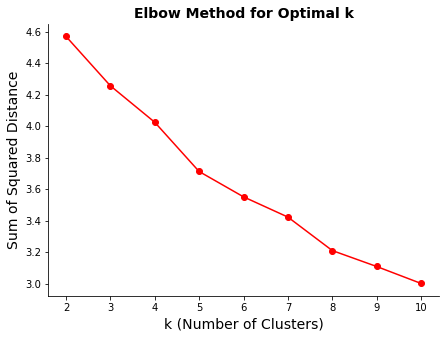

In [77]:
k_range = range(2,11)  # Range of k values to test
ssd = []  # Sum of Squared Distance

for k in k_range:
    model = KMeans(n_clusters=k, random_state=0).fit(X)
    ssd.append(model.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_range, ssd, 'ro-')
plt.title('Elbow Method for Optimal k', size=14, weight='bold')
plt.xlabel('k (Number of Clusters)', size=14)
plt.ylabel('Sum of Squared Distance', size=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('elbow.png', dpi=300, bbox_inches='tight')
plt.show()


Because there is no discernible "elbow" from the plot, another measure will be used: Silhouette Score. <h4>Silhouette Score</h4>.

We will define a function to plot the Silhouette Score that will be calculated using different number of clusters.

In [47]:

def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

[0.07467045051407287, 0.08642525444025333, 0.09038020402367744, 0.09730354326939716, 0.09792148305941945, 0.07646210556770004, 0.04596311677853783, 0.05614108682056828, 0.06305758539405418, 0.06510507347816044, 0.05233432004483969, 0.04689200568080317, 0.04949795724586871, 0.05177203851703055]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


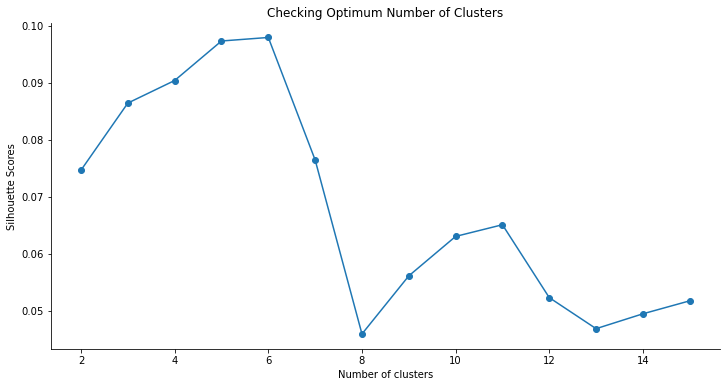

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = Mumbai_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)
    
print(scores)
print(kval)
plot(kval, scores)    

We can see that the silhouette scores are not very high even as we increase the number of clusters. This means that the inter-cluster distance between different clusters is not very high over the range of k-values. However, we will try to cluster our data as best as we can. For this, we will use 6 clusters for our clustering model since it provides the highest silhouette score as seen above.

In [78]:
k = 6

Mumbai_clustering = Mumbai_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(Mumbai_clustering) #Can choose any random_state

kmeans.labels_

array([1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 5, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 4, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 4, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 3], dtype=int32)


Now we can create a new dataframe that includes cluster labels and the top 10 venues.

In [84]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Mumbai_merged = df_Mumbai
Mumbai_merged = Mumbai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Lets view the newly created dataframe.

In [85]:
print(Mumbai_merged.shape)
Mumbai_merged

(93, 17)


,Neighborhood,Location,Latitude,Longitude,Cluster_Labels,ClusterLabels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,19.1293,72.84644,1,1,1,Indian Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Asian Restaurant,Bar,Bowling Alley,Snack Place,Chinese Restaurant,Metro Station
1,Chakala,Western Suburbs,19.10836,72.86233,1,1,1,Hotel,Indian Restaurant,Café,Multiplex,Hotel Bar,Pizza Place,Vegetarian / Vegan Restaurant,Asian Restaurant,Fast Food Restaurant,Restaurant
2,D.N. Nagar,Western Suburbs,19.124085,72.83248,2,2,2,Bar,Indian Restaurant,Pub,Gym / Fitness Center,Pizza Place,Coffee Shop,Snack Place,Vegetarian / Vegan Restaurant,Lounge,Concert Hall
3,Four Bungalows,Western Suburbs,19.12638,72.8242,2,2,2,Pub,Indian Restaurant,Café,Chinese Restaurant,Bar,Ice Cream Shop,Seafood Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place
4,Lokhandwala,Western Suburbs,19.14321,72.82497,2,2,2,Indian Restaurant,Chinese Restaurant,Pub,Café,Bakery,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Bar,Garden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.99568,72.84,1,1,1,Indian Restaurant,Coffee Shop,Plaza,Bar,Lounge,Maharashtrian Restaurant,Multicuisine Indian Restaurant,Pharmacy,Playground,Chinese Restaurant
89,Gowalia Tank,South Mumbai,18.96446,72.81117,2,2,2,Indian Restaurant,Bakery,Coffee Shop,Fast Food Restaurant,Café,Electronics Store,Pizza Place,Snack Place,Restaurant,Sandwich Place
90,Dava Bazaar,South Mumbai,19.1314,72.92696,1,1,1,Indian Restaurant,Train Station,Cupcake Shop,Coffee Shop,Café,Beer Garden,Hotel,Restaurant,Shopping Mall,Asian Restaurant
91,Dharavi,Mumbai,19.04674,72.85461,1,1,1,Indian Restaurant,Bakery,Gym / Fitness Center,Sandwich Place,Fast Food Restaurant,Lake,Seafood Restaurant,Garden,Diner,Shoe Store


We can visualize the clustering by creating a map.

<h4>3.6.b Visualizing Clusters</h4>

Now that each Neighborhood has been assigned a cluster label, it would be helpful to visualize the clusters on a map of Mumbai to see how they are distributed across the regions. Folium library is used for this purpose.

In [86]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [color.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Mumbai_merged['Latitude'], Mumbai_merged['Longitude'], Mumbai_merged['Neighborhood'], Mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can now view the neighborhoods in each cluster and their top 10 most common venues.

<h4>3.6.c Examining Each Cluster</h4>

Each cluster is filtered from the dataframe previously created in the clustering stage. The clusters are separately analyzed in order to gain an understanding of a discriminating venue that characterize each of them. In other words, the 1st most common venue category from each cluster will be singled out. We will also determine the regions (cities) in which a particular cluster is highly concentrated.

<h4>Cluster 1</h4>

In [73]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 0, Mumbai_merged.columns[[0] + [1] + list(range(6, Mumbai_merged.shape[1]))]]

,Neighborhood,Location,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Nalasopara,Western Suburbs,Bakery,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Diner,Department Store,Music Venue,Music Store,Multicuisine Indian Restaurant
59,Cotton Green,South Mumbai,Pizza Place,Fast Food Restaurant,Train Station,Multiplex,Music Venue,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop


<h4>Cluster 2</h4>

In [64]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 1, Mumbai_merged.columns[[0] + [1] + list(range(6, Mumbai_merged.shape[1]))]]

,Neighborhood,Location,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,Pizza Place,Coffee Shop,Sandwich Place,Asian Restaurant,Bar,Bowling Alley,Snack Place,Chinese Restaurant,Metro Station
1,Chakala,Western Suburbs,Indian Restaurant,Café,Multiplex,Hotel Bar,Pizza Place,Vegetarian / Vegan Restaurant,Asian Restaurant,Fast Food Restaurant,Restaurant
5,Marol,Western Suburbs,Hotel,Chinese Restaurant,Ice Cream Shop,Coffee Shop,Snack Place,Boat or Ferry,Fast Food Restaurant,Farmers Market,Lounge
9,Mira Road,Western Suburbs,Convenience Store,Bar,Movie Theater,Mexican Restaurant,Multicuisine Indian Restaurant,Fast Food Restaurant,General College & University,Market,Gift Shop
11,Uttan,Western Suburbs,Convenience Store,Indian Restaurant,Whisky Bar,Restaurant,Accessories Store,Mughlai Restaurant,Music Store,Multiplex,Multicuisine Indian Restaurant
15,I.C. Colony,Western Suburbs,Bakery,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Bar,Garden Center,Dessert Shop,Paper / Office Supplies Store,Soccer Field
20,Jogeshwari West,Western Suburbs,Snack Place,Asian Restaurant,Ice Cream Shop,Chinese Restaurant,Bank,Hotel,Smoke Shop,Café,Mughlai Restaurant
21,Juhu,Western Suburbs,Movie Theater,Coffee Shop,Fast Food Restaurant,Café,Vegetarian / Vegan Restaurant,Lounge,Department Store,Clothing Store,Restaurant
23,Poisar,Western Suburbs,Indian Restaurant,Electronics Store,Snack Place,Mexican Restaurant,Sporting Goods Shop,Bus Line,Diner,Gym / Fitness Center,Breakfast Spot
29,Sunder Nagar,Western Suburbs,Coffee Shop,Movie Theater,Fast Food Restaurant,Bakery,Café,Pizza Place,Restaurant,Breakfast Spot,Food Court


<h4>Cluster 3</h4>

In [65]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 2, Mumbai_merged.columns[[0] + [1] + list(range(6, Mumbai_merged.shape[1]))]]

,Neighborhood,Location,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,D.N. Nagar,Western Suburbs,Indian Restaurant,Pub,Gym / Fitness Center,Pizza Place,Coffee Shop,Snack Place,Vegetarian / Vegan Restaurant,Lounge,Concert Hall
3,Four Bungalows,Western Suburbs,Indian Restaurant,Café,Chinese Restaurant,Bar,Ice Cream Shop,Seafood Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place
4,Lokhandwala,Western Suburbs,Chinese Restaurant,Pub,Café,Bakery,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Bar,Garden
6,Sahar,Western Suburbs,Hotel,Café,Restaurant,Pizza Place,Seafood Restaurant,Multiplex,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
7,Seven Bungalows,Western Suburbs,Bar,Indian Restaurant,Pub,Ice Cream Shop,Seafood Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Pizza Place
8,Versova,Western Suburbs,Ice Cream Shop,Beach,Coffee Shop,Pizza Place,Chinese Restaurant,Middle Eastern Restaurant,Sandwich Place,Clothing Store,Bistro
10,Bhayandar,Western Suburbs,Bakery,Food Truck,Indian Restaurant,Pizza Place,Soccer Field,Diner,Train Station,Business Service,Multicuisine Indian Restaurant
12,Bandstand Promenade,Western Suburbs,Café,Indian Restaurant,Tea Room,Scenic Lookout,Deli / Bodega,Food Truck,Lounge,Cocktail Bar,Boutique
13,Kherwadi,Western Suburbs,Indian Restaurant,Restaurant,Seafood Restaurant,Bar,Italian Restaurant,Hookah Bar,Chinese Restaurant,Indie Movie Theater,Brazilian Restaurant
14,Pali Hill,Western Suburbs,Bakery,Fast Food Restaurant,Café,Dessert Shop,Italian Restaurant,Bar,Asian Restaurant,Seafood Restaurant,Chinese Restaurant


<h4>Cluster 4</h4>

In [66]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 3, Mumbai_merged.columns[[0] + [1] + list(range(6, Mumbai_merged.shape[1]))]]

,Neighborhood,Location,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
92,Thane,Mumbai,Performing Arts Venue,Pizza Place,Music Venue,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater


<h4>Cluster 5</h4>

In [67]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 4, Mumbai_merged.columns[[0] + [1] + list(range(6, Mumbai_merged.shape[1]))]]

,Neighborhood,Location,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Mankhurd,Harbour Suburbs,Coffee Shop,Train Station,Bus Station,Accessories Store,Music Venue,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop
80,Dagdi Chawl,South Mumbai,Harbor / Marina,Bus Station,Train Station,Bakery,Flower Shop,Motorcycle Shop,Movie Theater,Music Venue,Moving Target


<h4>Cluster 6</h4>

In [68]:
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 5, Mumbai_merged.columns[[0] + [1] + list(range(6, Mumbai_merged.shape[1]))]]

,Neighborhood,Location,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


<h3>4. Results and Discussion</h3>

By analyzing the six clusters obtained we can see that some of the clusters are more suited for restaurants and hotels, whereas, other clusters are less suited. Neighborhoods in clusters 4, 5 and 6 contain a small percentage of restaurants, hotels, cafe and pubs in their top 10 common venues. These clusters contain a higher degree of other venues like train station, bus station, fish market, gym, performing arts venue and smoke shop, to name a few. Thus, they are not well suited for opening a new restaurant. On the other hand, neighborhoods in clusters 1, 2 and 3 contain a much higher degree of restaurants, hotels, multiplex, cafes, bars and other food joints. Thus, the neighborhoods in these clusters would be well suited for opening a new restaurant.

Comparing clusters 2 and 3 neighborhoods in cluster 3 seem to be more suited for starting a restaurant since they contains a larger percentage of food joints in the top 10 most common venues than cluster 2. The neighborhoods in cluster 3 contain a variety of food joints like restaurants, tea rooms, bakery, cafe, steakhouse and pubs and also contain very diverse cuisines like Japanese, Indian, Chinese, Italian and seafood restaurants. Most neighborhoods in cluster 3 seem to have many Restaurant as their top most common venue; however, on careful analysis we can see that neighborhoods in cluster 3 also contain other venues like soccer field, flea market, smoke shop, gym, train station, dance studio, music store, cosmetics shop and so on. Thus, it is recommended that the new restaurant can be opened in the neighborhoods belonging to cluster 3. This neighborhood can be further plotted on a map as shown below.

In [74]:
new_restaurant_neighborhoods = Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 2, Mumbai_merged.columns[[0, 1, 2, 3] + list(range(6, Mumbai_merged.shape[1]))]]
new_restaurant_neighborhoods.head()

,Neighborhood,Location,Latitude,Longitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,D.N. Nagar,Western Suburbs,19.124085,72.83248,Indian Restaurant,Pub,Gym / Fitness Center,Pizza Place,Coffee Shop,Snack Place,Vegetarian / Vegan Restaurant,Lounge,Concert Hall
3,Four Bungalows,Western Suburbs,19.12638,72.8242,Indian Restaurant,Café,Chinese Restaurant,Bar,Ice Cream Shop,Seafood Restaurant,Gym / Fitness Center,Coffee Shop,Pizza Place
4,Lokhandwala,Western Suburbs,19.14321,72.82497,Chinese Restaurant,Pub,Café,Bakery,Gym / Fitness Center,Coffee Shop,Italian Restaurant,Bar,Garden
6,Sahar,Western Suburbs,19.105445,72.860602,Hotel,Café,Restaurant,Pizza Place,Seafood Restaurant,Multiplex,Asian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
7,Seven Bungalows,Western Suburbs,19.129052,72.82141,Bar,Indian Restaurant,Pub,Ice Cream Shop,Seafood Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Pizza Place


In [75]:
map_res_locations = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(new_restaurant_neighborhoods['Latitude'], new_restaurant_neighborhoods['Longitude'],
                                            new_restaurant_neighborhoods['Location'], new_restaurant_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='lightred'), tooltip=label).add_to(map_res_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res_locations) 

map_res_locations

<h3>5. Conclusion</h3>

We have successfully analyzed the neighborhoods in Mumbai, India for determining which would be the best neighborhoods for opening a new restaurant. Based on our analysis, neighborhoods in cluster 3 are recommended as locations for the new restaurant. This has also been plotted in the map above. The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated. These were out of the scope for this project and thus were not considered.